In [44]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn
!pip install keras

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras

pd.options.mode.chained_assignment = None

In [2]:
job= pd.read_csv("F:/Data Science/dataset.csv",thousands=',',skipinitialspace=True)
job.head()

,job,company,salary,work_type,gender,amount,rank,experience_required,address,description,requirement,benefit,keyword,skill,area
0,Full-Stack Developer (Mobile/ Web Developer ) ...,Công ty TNHH Nippon Steel Metal Products Vietnam,40 triệu,Toàn thời gian,Không yêu cầu,3,Nhân viên,1,"- VPĐD tại Hà Nội: Tầng 17, Tòa Icon 4, 243A Đ...",Công việc chuyên môn:\n- Tham gia các dự án ph...,Yêu cầu chung:\n- Trình độ: Junior ~ Mid-level...,"- Được làm việc trong môi trường quốc tế, trẻ ...",IT phần mềm Công nghệ thông tin,Java React Native Spring Boot Spring MVC,Hà Nội
1,Nhân Viên Kinh Doanh Tm/Dự Án,Công ty TNHH Xây dựng và thương mại Đức Nam,15-50 triệu,Toàn thời gian,Không yêu cầu,3,Nhân viên,1,#NAME?,- Duy trì và phát triển những mối quan hệ kinh...,- Tốt nghiệp Cao đẳng/Đại học chuyên ngành Quả...,- Số ngày làm việc trong tuần: 06 ngày (từ thứ...,Thiết kế nội thất Kinh doanh / Bán hàng Xây dựng,Hà Nội,Hà Nội
2,Chuyên Viên Kinh Doanh B2B - Direct Sales (Thu...,CÔNG TY CỔ PHẦN INTERCOMMS VIỆT NAM,10-30 triệu,Toàn thời gian,Không yêu cầu,3,Nhân viên,1,"- Văn phòng: HÀ NỘI: Tầng 6, Tòa nhà Imperia G...","Thực hiện công tác tìm kiếm, xây dựng, phát tr...",Tốt nghiệp đại học/cao đẳng ưu tiên chuyên ngà...,Lương Cơ Bản: 6.000.000 - 10.000.000 đồng/thán...,Kinh doanh / Bán hàng Dịch vụ khách hàng Tư vấn,Hà Nội Hồ Chí Minh,Hà Nội
3,Nhân Viên Kinh Doanh Tư Vấn Bán Hàng (Sale Onl...,Công ty CP Phát Triển Công Nghệ Hợp Nhất,6 triệu,Toàn thời gian,Không yêu cầu,5,Nhân viên,Không yêu cầu kinh nghiệm,"- TT 17-B4, Khu đô thị Văn Quán , Phường Phúc ...",#NAME?,"- Tốt nghiệp Trung cấp - cao đẳng , đại học.\n...","- Lương cơ bản: Từ 6-8 triệu , tuỳ theo kinh n...",Kinh doanh / Bán hàng Tư vấn Bán lẻ / bán sỉ,Hà Nội,Hà Nội
4,Nhân Viên Kỹ Thuật Sửa Chữa Máy Công Trình - O...,Công ty tnhh thiết bị và xây dựng công trình H...,7-15 triệu,Toàn thời gian,Không yêu cầu,2,Nhân viên,1,"- Số 169 Linh Đường, KĐT Linh đàm, Hoàng mai, ...","- Bảo dưỡng, sửa chữa các thiết bị tại kho xưở...","- Nam, tuổi đời 20 - 45 tuổi.\n- Sinh viên Tốt...",- Thu nhập hàng tháng bao gồm: Lương cơ bản+ p...,Bán hàng kỹ thuật Công nghệ Ô tô,Hà Nội,Hà Nội


In [5]:
job.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10798 entries, 0 to 10797
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job                  10798 non-null  object
 1   company              10798 non-null  object
 2   salary               10798 non-null  object
 3   work_type            10798 non-null  object
 4   gender               10798 non-null  object
 5   amount               10798 non-null  int64 
 6   rank                 10798 non-null  object
 7   experience_required  10798 non-null  object
 8   address              10798 non-null  object
 9   description          10798 non-null  object
 10  requirement          10798 non-null  object
 11  benefit              10798 non-null  object
 12  keyword              10798 non-null  object
 13  skill                10798 non-null  object
 14  area                 10798 non-null  object
dtypes: int64(1), object(14)
memory usage: 1.2+ MB


# 1. Tiền xử lý dữ liệu

In [3]:
## xử lý dữ liệu lương
job1 = job[job.salary.notnull()]
for i in range(0,len(job1.salary)):
    job1.salary[i]= job1.salary[i].split('-')[0]
    if 'triệu' in job1.salary[i]:
        price = job1.salary[i].split(' ')[0]
        job1.salary[i] = round(int(price)*1000000,1)
    else:
        job1.salary[i] = round(int(price)*1000000,1)
job1.head()

,job,company,salary,work_type,gender,amount,rank,experience_required,address,description,requirement,benefit,keyword,skill,area
0,Full-Stack Developer (Mobile/ Web Developer ) ...,Công ty TNHH Nippon Steel Metal Products Vietnam,40000000,Toàn thời gian,Không yêu cầu,3,Nhân viên,1,"- VPĐD tại Hà Nội: Tầng 17, Tòa Icon 4, 243A Đ...",Công việc chuyên môn:\n- Tham gia các dự án ph...,Yêu cầu chung:\n- Trình độ: Junior ~ Mid-level...,"- Được làm việc trong môi trường quốc tế, trẻ ...",IT phần mềm Công nghệ thông tin,Java React Native Spring Boot Spring MVC,Hà Nội
1,Nhân Viên Kinh Doanh Tm/Dự Án,Công ty TNHH Xây dựng và thương mại Đức Nam,40000000,Toàn thời gian,Không yêu cầu,3,Nhân viên,1,#NAME?,- Duy trì và phát triển những mối quan hệ kinh...,- Tốt nghiệp Cao đẳng/Đại học chuyên ngành Quả...,- Số ngày làm việc trong tuần: 06 ngày (từ thứ...,Thiết kế nội thất Kinh doanh / Bán hàng Xây dựng,Hà Nội,Hà Nội
2,Chuyên Viên Kinh Doanh B2B - Direct Sales (Thu...,CÔNG TY CỔ PHẦN INTERCOMMS VIỆT NAM,40000000,Toàn thời gian,Không yêu cầu,3,Nhân viên,1,"- Văn phòng: HÀ NỘI: Tầng 6, Tòa nhà Imperia G...","Thực hiện công tác tìm kiếm, xây dựng, phát tr...",Tốt nghiệp đại học/cao đẳng ưu tiên chuyên ngà...,Lương Cơ Bản: 6.000.000 - 10.000.000 đồng/thán...,Kinh doanh / Bán hàng Dịch vụ khách hàng Tư vấn,Hà Nội Hồ Chí Minh,Hà Nội
3,Nhân Viên Kinh Doanh Tư Vấn Bán Hàng (Sale Onl...,Công ty CP Phát Triển Công Nghệ Hợp Nhất,6000000,Toàn thời gian,Không yêu cầu,5,Nhân viên,Không yêu cầu kinh nghiệm,"- TT 17-B4, Khu đô thị Văn Quán , Phường Phúc ...",#NAME?,"- Tốt nghiệp Trung cấp - cao đẳng , đại học.\n...","- Lương cơ bản: Từ 6-8 triệu , tuỳ theo kinh n...",Kinh doanh / Bán hàng Tư vấn Bán lẻ / bán sỉ,Hà Nội,Hà Nội
4,Nhân Viên Kỹ Thuật Sửa Chữa Máy Công Trình - O...,Công ty tnhh thiết bị và xây dựng công trình H...,6000000,Toàn thời gian,Không yêu cầu,2,Nhân viên,1,"- Số 169 Linh Đường, KĐT Linh đàm, Hoàng mai, ...","- Bảo dưỡng, sửa chữa các thiết bị tại kho xưở...","- Nam, tuổi đời 20 - 45 tuổi.\n- Sinh viên Tốt...",- Thu nhập hàng tháng bao gồm: Lương cơ bản+ p...,Bán hàng kỹ thuật Công nghệ Ô tô,Hà Nội,Hà Nội


In [4]:
## tiền xử lý dữ liệu chuyên ngành
job2 = job1[job.keyword.notnull()]
for i in range(0,len(job2.keyword)):
    if '/' in job2.keyword[i]:
        job2.keyword[i]= job2.keyword[i].split('/')[0]
job2.head()

,job,company,salary,work_type,gender,amount,rank,experience_required,address,description,requirement,benefit,keyword,skill,area
0,Full-Stack Developer (Mobile/ Web Developer ) ...,Công ty TNHH Nippon Steel Metal Products Vietnam,40000000,Toàn thời gian,Không yêu cầu,3,Nhân viên,1,"- VPĐD tại Hà Nội: Tầng 17, Tòa Icon 4, 243A Đ...",Công việc chuyên môn:\n- Tham gia các dự án ph...,Yêu cầu chung:\n- Trình độ: Junior ~ Mid-level...,"- Được làm việc trong môi trường quốc tế, trẻ ...",IT phần mềm Công nghệ thông tin,Java React Native Spring Boot Spring MVC,Hà Nội
1,Nhân Viên Kinh Doanh Tm/Dự Án,Công ty TNHH Xây dựng và thương mại Đức Nam,40000000,Toàn thời gian,Không yêu cầu,3,Nhân viên,1,#NAME?,- Duy trì và phát triển những mối quan hệ kinh...,- Tốt nghiệp Cao đẳng/Đại học chuyên ngành Quả...,- Số ngày làm việc trong tuần: 06 ngày (từ thứ...,Thiết kế nội thất Kinh doanh,Hà Nội,Hà Nội
2,Chuyên Viên Kinh Doanh B2B - Direct Sales (Thu...,CÔNG TY CỔ PHẦN INTERCOMMS VIỆT NAM,40000000,Toàn thời gian,Không yêu cầu,3,Nhân viên,1,"- Văn phòng: HÀ NỘI: Tầng 6, Tòa nhà Imperia G...","Thực hiện công tác tìm kiếm, xây dựng, phát tr...",Tốt nghiệp đại học/cao đẳng ưu tiên chuyên ngà...,Lương Cơ Bản: 6.000.000 - 10.000.000 đồng/thán...,Kinh doanh,Hà Nội Hồ Chí Minh,Hà Nội
3,Nhân Viên Kinh Doanh Tư Vấn Bán Hàng (Sale Onl...,Công ty CP Phát Triển Công Nghệ Hợp Nhất,6000000,Toàn thời gian,Không yêu cầu,5,Nhân viên,Không yêu cầu kinh nghiệm,"- TT 17-B4, Khu đô thị Văn Quán , Phường Phúc ...",#NAME?,"- Tốt nghiệp Trung cấp - cao đẳng , đại học.\n...","- Lương cơ bản: Từ 6-8 triệu , tuỳ theo kinh n...",Kinh doanh,Hà Nội,Hà Nội
4,Nhân Viên Kỹ Thuật Sửa Chữa Máy Công Trình - O...,Công ty tnhh thiết bị và xây dựng công trình H...,6000000,Toàn thời gian,Không yêu cầu,2,Nhân viên,1,"- Số 169 Linh Đường, KĐT Linh đàm, Hoàng mai, ...","- Bảo dưỡng, sửa chữa các thiết bị tại kho xưở...","- Nam, tuổi đời 20 - 45 tuổi.\n- Sinh viên Tốt...",- Thu nhập hàng tháng bao gồm: Lương cơ bản+ p...,Bán hàng kỹ thuật Công nghệ Ô tô,Hà Nội,Hà Nội


In [5]:
## tiền xử lý dữ liệu yêu cầu kinh nghiệm
job3 = job2[job.experience_required.notnull()]
for i in range(0,len(job3.experience_required)):
    if 'Không yêu cầu kinh nghiệm' in job3.experience_required[i]:
        job3.experience_required[i]= '0'
job3.head()

,job,company,salary,work_type,gender,amount,rank,experience_required,address,description,requirement,benefit,keyword,skill,area
0,Full-Stack Developer (Mobile/ Web Developer ) ...,Công ty TNHH Nippon Steel Metal Products Vietnam,40000000,Toàn thời gian,Không yêu cầu,3,Nhân viên,1,"- VPĐD tại Hà Nội: Tầng 17, Tòa Icon 4, 243A Đ...",Công việc chuyên môn:\n- Tham gia các dự án ph...,Yêu cầu chung:\n- Trình độ: Junior ~ Mid-level...,"- Được làm việc trong môi trường quốc tế, trẻ ...",IT phần mềm Công nghệ thông tin,Java React Native Spring Boot Spring MVC,Hà Nội
1,Nhân Viên Kinh Doanh Tm/Dự Án,Công ty TNHH Xây dựng và thương mại Đức Nam,40000000,Toàn thời gian,Không yêu cầu,3,Nhân viên,1,#NAME?,- Duy trì và phát triển những mối quan hệ kinh...,- Tốt nghiệp Cao đẳng/Đại học chuyên ngành Quả...,- Số ngày làm việc trong tuần: 06 ngày (từ thứ...,Thiết kế nội thất Kinh doanh,Hà Nội,Hà Nội
2,Chuyên Viên Kinh Doanh B2B - Direct Sales (Thu...,CÔNG TY CỔ PHẦN INTERCOMMS VIỆT NAM,40000000,Toàn thời gian,Không yêu cầu,3,Nhân viên,1,"- Văn phòng: HÀ NỘI: Tầng 6, Tòa nhà Imperia G...","Thực hiện công tác tìm kiếm, xây dựng, phát tr...",Tốt nghiệp đại học/cao đẳng ưu tiên chuyên ngà...,Lương Cơ Bản: 6.000.000 - 10.000.000 đồng/thán...,Kinh doanh,Hà Nội Hồ Chí Minh,Hà Nội
3,Nhân Viên Kinh Doanh Tư Vấn Bán Hàng (Sale Onl...,Công ty CP Phát Triển Công Nghệ Hợp Nhất,6000000,Toàn thời gian,Không yêu cầu,5,Nhân viên,0,"- TT 17-B4, Khu đô thị Văn Quán , Phường Phúc ...",#NAME?,"- Tốt nghiệp Trung cấp - cao đẳng , đại học.\n...","- Lương cơ bản: Từ 6-8 triệu , tuỳ theo kinh n...",Kinh doanh,Hà Nội,Hà Nội
4,Nhân Viên Kỹ Thuật Sửa Chữa Máy Công Trình - O...,Công ty tnhh thiết bị và xây dựng công trình H...,6000000,Toàn thời gian,Không yêu cầu,2,Nhân viên,1,"- Số 169 Linh Đường, KĐT Linh đàm, Hoàng mai, ...","- Bảo dưỡng, sửa chữa các thiết bị tại kho xưở...","- Nam, tuổi đời 20 - 45 tuổi.\n- Sinh viên Tốt...",- Thu nhập hàng tháng bao gồm: Lương cơ bản+ p...,Bán hàng kỹ thuật Công nghệ Ô tô,Hà Nội,Hà Nội


In [6]:
## tiền xử lý dữ liệu chuyên ngành
job4 = job3[job.keyword.notnull()]
for i in range(0,len(job4.keyword)):
    if 'IT' in job4.keyword[i]:
        job4.keyword[i]= 'CNTT'
    if 'Kinh doanh' in job4.keyword[i]:
        job4.keyword[i] = 'Kinh doanh'
    if 'Dịch vụ' in job4.keyword[i]:
        job4.keyword[i] = 'Dịch vụ'
    if 'Hành chính' in job4.keyword[i]:
        job4.keyword[i] = 'Hành Chính'
    if 'Thiết kế' in job4.keyword[i]:
        job4.keyword[i] = 'Thiết kế'
    if 'Kiến trúc' in job4.keyword[i]:
        job4.keyword[i] = 'Kiến trúc'
    if 'Xây dựng' in job4.keyword[i]:
        job4.keyword[i] = 'Xây dựng'
    if 'Logistic' in job4.keyword[i]:
        job4.keyword[i] = 'Logistic'
    if 'Nhân sự' in job4.keyword[i]:
        job4.keyword[i] = 'Hành Chính'
    if 'Sản xuất' in job4.keyword[i]:
        job4.keyword[i] = 'Sản xuất'
job4.head()

,job,company,salary,work_type,gender,amount,rank,experience_required,address,description,requirement,benefit,keyword,skill,area
0,Full-Stack Developer (Mobile/ Web Developer ) ...,Công ty TNHH Nippon Steel Metal Products Vietnam,40000000,Toàn thời gian,Không yêu cầu,3,Nhân viên,1,"- VPĐD tại Hà Nội: Tầng 17, Tòa Icon 4, 243A Đ...",Công việc chuyên môn:\n- Tham gia các dự án ph...,Yêu cầu chung:\n- Trình độ: Junior ~ Mid-level...,"- Được làm việc trong môi trường quốc tế, trẻ ...",CNTT,Java React Native Spring Boot Spring MVC,Hà Nội
1,Nhân Viên Kinh Doanh Tm/Dự Án,Công ty TNHH Xây dựng và thương mại Đức Nam,40000000,Toàn thời gian,Không yêu cầu,3,Nhân viên,1,#NAME?,- Duy trì và phát triển những mối quan hệ kinh...,- Tốt nghiệp Cao đẳng/Đại học chuyên ngành Quả...,- Số ngày làm việc trong tuần: 06 ngày (từ thứ...,Kinh doanh,Hà Nội,Hà Nội
2,Chuyên Viên Kinh Doanh B2B - Direct Sales (Thu...,CÔNG TY CỔ PHẦN INTERCOMMS VIỆT NAM,40000000,Toàn thời gian,Không yêu cầu,3,Nhân viên,1,"- Văn phòng: HÀ NỘI: Tầng 6, Tòa nhà Imperia G...","Thực hiện công tác tìm kiếm, xây dựng, phát tr...",Tốt nghiệp đại học/cao đẳng ưu tiên chuyên ngà...,Lương Cơ Bản: 6.000.000 - 10.000.000 đồng/thán...,Kinh doanh,Hà Nội Hồ Chí Minh,Hà Nội
3,Nhân Viên Kinh Doanh Tư Vấn Bán Hàng (Sale Onl...,Công ty CP Phát Triển Công Nghệ Hợp Nhất,6000000,Toàn thời gian,Không yêu cầu,5,Nhân viên,0,"- TT 17-B4, Khu đô thị Văn Quán , Phường Phúc ...",#NAME?,"- Tốt nghiệp Trung cấp - cao đẳng , đại học.\n...","- Lương cơ bản: Từ 6-8 triệu , tuỳ theo kinh n...",Kinh doanh,Hà Nội,Hà Nội
4,Nhân Viên Kỹ Thuật Sửa Chữa Máy Công Trình - O...,Công ty tnhh thiết bị và xây dựng công trình H...,6000000,Toàn thời gian,Không yêu cầu,2,Nhân viên,1,"- Số 169 Linh Đường, KĐT Linh đàm, Hoàng mai, ...","- Bảo dưỡng, sửa chữa các thiết bị tại kho xưở...","- Nam, tuổi đời 20 - 45 tuổi.\n- Sinh viên Tốt...",- Thu nhập hàng tháng bao gồm: Lương cơ bản+ p...,Bán hàng kỹ thuật Công nghệ Ô tô,Hà Nội,Hà Nội


In [7]:
## tiền xử lý dữ liệu yêu cầu kinh nghiệm
job5 = job4[job.experience_required.notnull()]
for i in range(0,len(job5.experience_required)):
    if 'Dưới 1' in job5.experience_required[i]:
        job5.experience_required[i]= '0'
job5.head()

,job,company,salary,work_type,gender,amount,rank,experience_required,address,description,requirement,benefit,keyword,skill,area
0,Full-Stack Developer (Mobile/ Web Developer ) ...,Công ty TNHH Nippon Steel Metal Products Vietnam,40000000,Toàn thời gian,Không yêu cầu,3,Nhân viên,1,"- VPĐD tại Hà Nội: Tầng 17, Tòa Icon 4, 243A Đ...",Công việc chuyên môn:\n- Tham gia các dự án ph...,Yêu cầu chung:\n- Trình độ: Junior ~ Mid-level...,"- Được làm việc trong môi trường quốc tế, trẻ ...",CNTT,Java React Native Spring Boot Spring MVC,Hà Nội
1,Nhân Viên Kinh Doanh Tm/Dự Án,Công ty TNHH Xây dựng và thương mại Đức Nam,40000000,Toàn thời gian,Không yêu cầu,3,Nhân viên,1,#NAME?,- Duy trì và phát triển những mối quan hệ kinh...,- Tốt nghiệp Cao đẳng/Đại học chuyên ngành Quả...,- Số ngày làm việc trong tuần: 06 ngày (từ thứ...,Kinh doanh,Hà Nội,Hà Nội
2,Chuyên Viên Kinh Doanh B2B - Direct Sales (Thu...,CÔNG TY CỔ PHẦN INTERCOMMS VIỆT NAM,40000000,Toàn thời gian,Không yêu cầu,3,Nhân viên,1,"- Văn phòng: HÀ NỘI: Tầng 6, Tòa nhà Imperia G...","Thực hiện công tác tìm kiếm, xây dựng, phát tr...",Tốt nghiệp đại học/cao đẳng ưu tiên chuyên ngà...,Lương Cơ Bản: 6.000.000 - 10.000.000 đồng/thán...,Kinh doanh,Hà Nội Hồ Chí Minh,Hà Nội
3,Nhân Viên Kinh Doanh Tư Vấn Bán Hàng (Sale Onl...,Công ty CP Phát Triển Công Nghệ Hợp Nhất,6000000,Toàn thời gian,Không yêu cầu,5,Nhân viên,0,"- TT 17-B4, Khu đô thị Văn Quán , Phường Phúc ...",#NAME?,"- Tốt nghiệp Trung cấp - cao đẳng , đại học.\n...","- Lương cơ bản: Từ 6-8 triệu , tuỳ theo kinh n...",Kinh doanh,Hà Nội,Hà Nội
4,Nhân Viên Kỹ Thuật Sửa Chữa Máy Công Trình - O...,Công ty tnhh thiết bị và xây dựng công trình H...,6000000,Toàn thời gian,Không yêu cầu,2,Nhân viên,1,"- Số 169 Linh Đường, KĐT Linh đàm, Hoàng mai, ...","- Bảo dưỡng, sửa chữa các thiết bị tại kho xưở...","- Nam, tuổi đời 20 - 45 tuổi.\n- Sinh viên Tốt...",- Thu nhập hàng tháng bao gồm: Lương cơ bản+ p...,Bán hàng kỹ thuật Công nghệ Ô tô,Hà Nội,Hà Nội


In [8]:
conditions = [
    (job5['salary'] <= 5000000),
    (job5['salary'] > 5000000) & (job5['salary'] <= 20000000),
    (job5['salary'] > 20000000)
    ]

values = ['0', '1', '2']

job5['tier'] = np.select(conditions, values)

job5.head()

,job,company,salary,work_type,gender,amount,rank,experience_required,address,description,requirement,benefit,keyword,skill,area,tier
0,Full-Stack Developer (Mobile/ Web Developer ) ...,Công ty TNHH Nippon Steel Metal Products Vietnam,40000000,Toàn thời gian,Không yêu cầu,3,Nhân viên,1,"- VPĐD tại Hà Nội: Tầng 17, Tòa Icon 4, 243A Đ...",Công việc chuyên môn:\n- Tham gia các dự án ph...,Yêu cầu chung:\n- Trình độ: Junior ~ Mid-level...,"- Được làm việc trong môi trường quốc tế, trẻ ...",CNTT,Java React Native Spring Boot Spring MVC,Hà Nội,2
1,Nhân Viên Kinh Doanh Tm/Dự Án,Công ty TNHH Xây dựng và thương mại Đức Nam,40000000,Toàn thời gian,Không yêu cầu,3,Nhân viên,1,#NAME?,- Duy trì và phát triển những mối quan hệ kinh...,- Tốt nghiệp Cao đẳng/Đại học chuyên ngành Quả...,- Số ngày làm việc trong tuần: 06 ngày (từ thứ...,Kinh doanh,Hà Nội,Hà Nội,2
2,Chuyên Viên Kinh Doanh B2B - Direct Sales (Thu...,CÔNG TY CỔ PHẦN INTERCOMMS VIỆT NAM,40000000,Toàn thời gian,Không yêu cầu,3,Nhân viên,1,"- Văn phòng: HÀ NỘI: Tầng 6, Tòa nhà Imperia G...","Thực hiện công tác tìm kiếm, xây dựng, phát tr...",Tốt nghiệp đại học/cao đẳng ưu tiên chuyên ngà...,Lương Cơ Bản: 6.000.000 - 10.000.000 đồng/thán...,Kinh doanh,Hà Nội Hồ Chí Minh,Hà Nội,2
3,Nhân Viên Kinh Doanh Tư Vấn Bán Hàng (Sale Onl...,Công ty CP Phát Triển Công Nghệ Hợp Nhất,6000000,Toàn thời gian,Không yêu cầu,5,Nhân viên,0,"- TT 17-B4, Khu đô thị Văn Quán , Phường Phúc ...",#NAME?,"- Tốt nghiệp Trung cấp - cao đẳng , đại học.\n...","- Lương cơ bản: Từ 6-8 triệu , tuỳ theo kinh n...",Kinh doanh,Hà Nội,Hà Nội,1
4,Nhân Viên Kỹ Thuật Sửa Chữa Máy Công Trình - O...,Công ty tnhh thiết bị và xây dựng công trình H...,6000000,Toàn thời gian,Không yêu cầu,2,Nhân viên,1,"- Số 169 Linh Đường, KĐT Linh đàm, Hoàng mai, ...","- Bảo dưỡng, sửa chữa các thiết bị tại kho xưở...","- Nam, tuổi đời 20 - 45 tuổi.\n- Sinh viên Tốt...",- Thu nhập hàng tháng bao gồm: Lương cơ bản+ p...,Bán hàng kỹ thuật Công nghệ Ô tô,Hà Nội,Hà Nội,1


In [9]:
## xuất file dataset sau khi xử lý
job5.to_csv('final_set_job.csv',encoding="utf-8-sig",index=False)

## 2. Trực quan dữ liệu

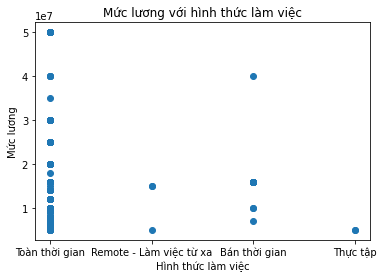

In [10]:
work_type, salary = job4['work_type'], job4['salary']
plt.scatter(work_type,salary)
plt.title('Mức lương với hình thức làm việc')
plt.xlabel('Hình thức làm việc')
plt.ylabel('Mức lương');

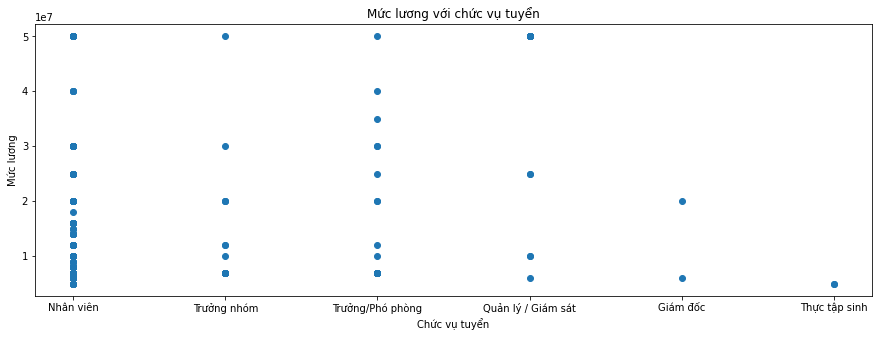

In [11]:
rank, salary = job4['rank'], job4['salary']
plt.figure(figsize=(15,5))
plt.scatter(rank,salary)
plt.title('Mức lương với chức vụ tuyển')
plt.xlabel('Chức vụ tuyển')
plt.ylabel('Mức lương');

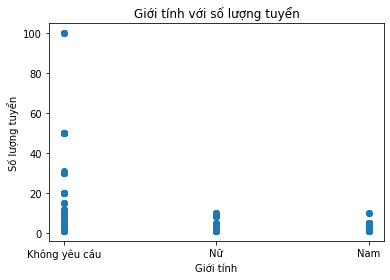

In [12]:
gender, amount = job4['gender'], job4['amount']
plt.scatter(gender,amount)
plt.title('Giới tính với số lượng tuyển')
plt.xlabel('Giới tính')
plt.ylabel('Số lượng tuyển');

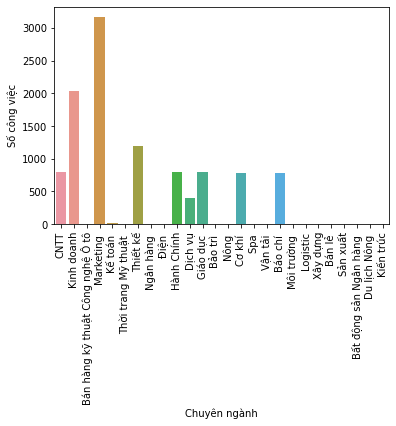

In [12]:
sns.countplot(x='keyword',data=job4)
plt.rcParams['figure.figsize'] = (18, 8)
plt.xlabel('Chuyên ngành')
plt.xticks(rotation=90)
plt.ylabel('Số công việc')
plt.show()

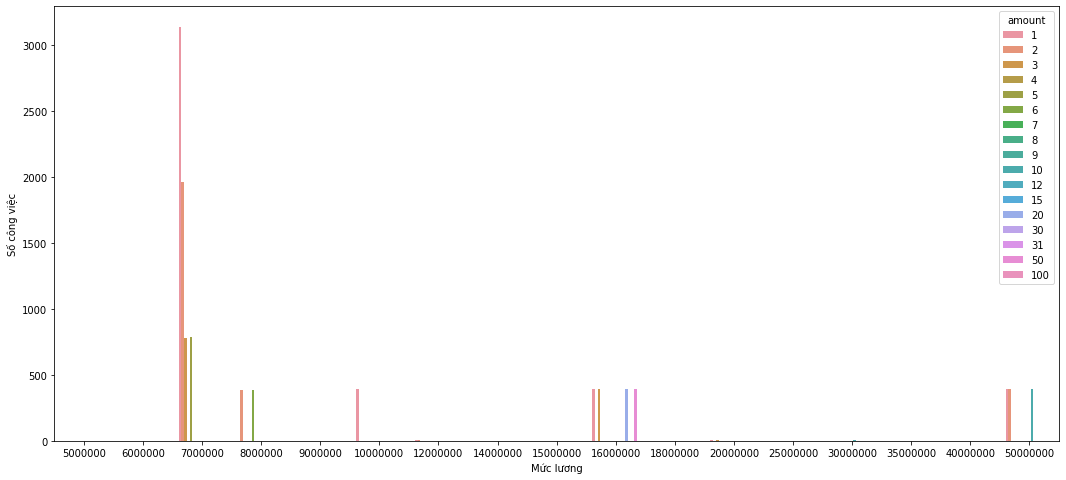

In [13]:
sns.countplot(x='salary',hue='amount',data=job3)
plt.rcParams['figure.figsize'] = (18, 8)
plt.xlabel('Mức lương')
plt.ylabel('Số công việc')
plt.show()

## 3. Học máy

In [14]:
## đọc file dataset
job = pd.read_csv('final_set_job.csv')
job.info()
job.dtypes
job.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10798 entries, 0 to 10797
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job                  10798 non-null  object
 1   company              10798 non-null  object
 2   salary               10798 non-null  int64 
 3   work_type            10798 non-null  object
 4   gender               10798 non-null  object
 5   amount               10798 non-null  int64 
 6   rank                 10798 non-null  object
 7   experience_required  10798 non-null  int64 
 8   address              10798 non-null  object
 9   description          10798 non-null  object
 10  requirement          10798 non-null  object
 11  benefit              10798 non-null  object
 12  keyword              10798 non-null  object
 13  skill                10798 non-null  object
 14  area                 10798 non-null  object
 15  tier                 10798 non-null  int64 
dtypes: i

,salary,amount,experience_required,tier
count,1.079800e+04,10798.000000,10798.000000,10798.000000
mean,1.335812e+07,4.869235,1.070754,1.112058
std,1.332902e+07,9.783804,0.862929,0.318084
min,5.000000e+06,1.000000,0.000000,0.000000
25%,7.000000e+06,1.000000,0.000000,1.000000
50%,7.000000e+06,2.000000,1.000000,1.000000
75%,1.600000e+07,3.000000,2.000000,1.000000
max,5.000000e+07,100.000000,5.000000,2.000000


In [15]:
## định dạng dữ liệu
data_dummies = pd.get_dummies(job, drop_first=True)
data_dummies = data_dummies.astype(float)
dataset = data_dummies.values
dataset

array([[4.0e+07, 3.0e+00, 1.0e+00, ..., 0.0e+00, 0.0e+00, 0.0e+00],
       [4.0e+07, 3.0e+00, 1.0e+00, ..., 0.0e+00, 0.0e+00, 0.0e+00],
       [4.0e+07, 3.0e+00, 1.0e+00, ..., 0.0e+00, 0.0e+00, 0.0e+00],
       ...,
       [1.0e+07, 1.0e+00, 3.0e+00, ..., 0.0e+00, 0.0e+00, 1.0e+00],
       [1.6e+07, 2.0e+01, 0.0e+00, ..., 0.0e+00, 0.0e+00, 0.0e+00],
       [1.6e+07, 5.0e+01, 2.0e+00, ..., 0.0e+00, 0.0e+00, 0.0e+00]])

In [16]:
## tách dataset
X = dataset[:,0:3]
Y = dataset[:,3]
Y

array([2., 2., 2., ..., 1., 1., 1.])

In [17]:
## chia tỉ lệ dữ liệu
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale

array([[0.77777778, 0.02020202, 0.2       ],
       [0.77777778, 0.02020202, 0.2       ],
       [0.77777778, 0.02020202, 0.2       ],
       ...,
       [0.11111111, 0.        , 0.6       ],
       [0.24444444, 0.19191919, 0.        ],
       [0.24444444, 0.49494949, 0.4       ]])

In [18]:
## tách dataset để tiến hành train
from sklearn.model_selection import train_test_split
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(7558, 3) (1620, 3) (1620, 3) (7558,) (1620,) (1620,)


In [19]:
## mô phỏng học máy
from keras.models import Sequential
from keras.layers import Dense

In [20]:
## cấu hình NN
model = Sequential([
    Dense(32, activation='relu', input_shape=(3,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [21]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
237/237 [==============================] - 1s 1ms/step - loss: 0.0868 - accuracy: 0.8877 - val_loss: -0.4507 - val_accuracy: 0.8679
Epoch 2/100
237/237 [==============================] - 0s 1ms/step - loss: -0.9702 - accuracy: 0.8908 - val_loss: -2.5729 - val_accuracy: 0.8679
Epoch 3/100
237/237 [==============================] - 0s 1ms/step - loss: -34.9617 - accuracy: 0.8908 - val_loss: -406.6031 - val_accuracy: 0.8679
Epoch 4/100
237/237 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.2383 - val_loss: nan - val_accuracy: 0.0012
Epoch 5/100
237/237 [==============================] - 0s 1ms/step - loss: nan - accuracy: 2.6462e-04 - val_loss: nan - val_accuracy: 0.0012
Epoch 6/100
237/237 [==============================] - 0s 1ms/step - loss: nan - accuracy: 2.6462e-04 - val_loss: nan - val_accuracy: 0.0012
Epoch 7/100
237/237 [==============================] - 0s 1ms/step - loss: nan - accuracy: 2.6462e-04 - val_loss: nan - val_accuracy: 0.0012
Epo

237/237 [==============================] - 0s 1ms/step - loss: nan - accuracy: 2.6462e-04 - val_loss: nan - val_accuracy: 0.0012
Epoch 59/100
237/237 [==============================] - 0s 1ms/step - loss: nan - accuracy: 2.6462e-04 - val_loss: nan - val_accuracy: 0.0012
Epoch 60/100
237/237 [==============================] - 0s 1ms/step - loss: nan - accuracy: 2.6462e-04 - val_loss: nan - val_accuracy: 0.0012
Epoch 61/100
237/237 [==============================] - 0s 1ms/step - loss: nan - accuracy: 2.6462e-04 - val_loss: nan - val_accuracy: 0.0012
Epoch 62/100
237/237 [==============================] - 0s 998us/step - loss: nan - accuracy: 2.6462e-04 - val_loss: nan - val_accuracy: 0.0012
Epoch 63/100
237/237 [==============================] - 0s 1ms/step - loss: nan - accuracy: 2.6462e-04 - val_loss: nan - val_accuracy: 0.0012
Epoch 64/100
237/237 [==============================] - 0s 1ms/step - loss: nan - accuracy: 2.6462e-04 - val_loss: nan - val_accuracy: 0.0012
Epoch 65/100
237/

In [23]:
model.evaluate(X_test, Y_test)[1]

51/51 [==============================] - 0s 780us/step - loss: nan - accuracy: 0.0031


0.003086419776082039

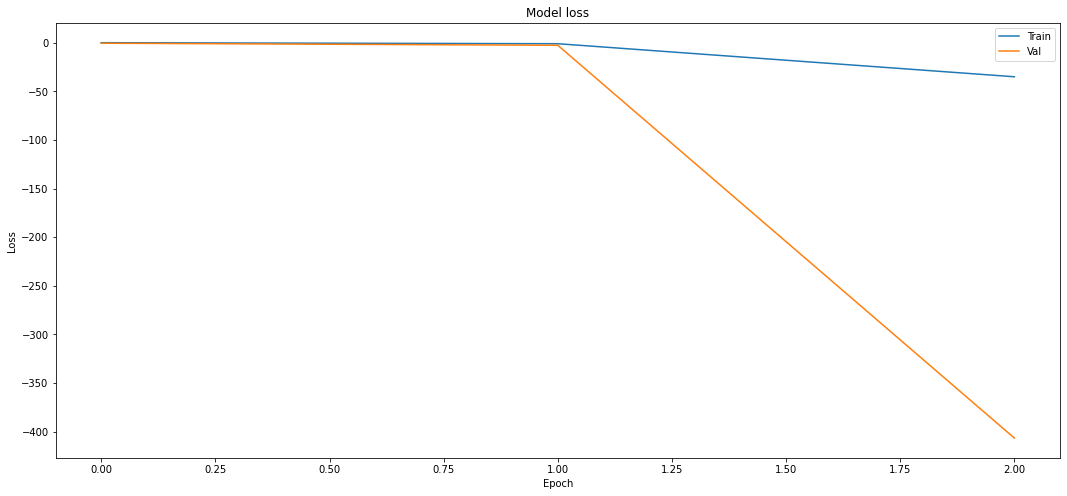

In [24]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

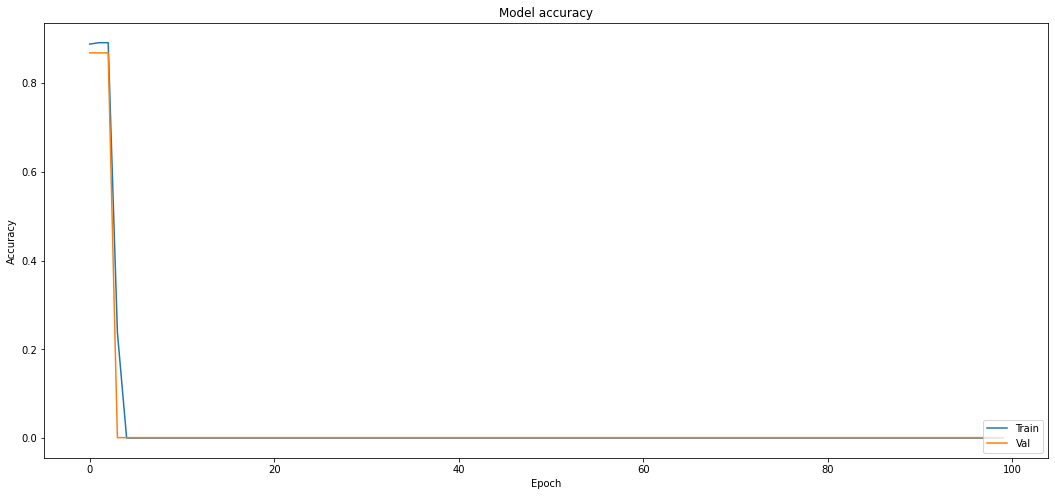

In [25]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()